# Basic Machine Learning with Python

Machine Learning (ML) can be a large aspect of data science. 

Scikit-Learn is one library in Python that offers a lot of functionality for machine learning. It is built on top of scipy.

What kind of things can you do with machine learning? Scikit-learn functionality includes:
- Clustering (finding order in your data)
- Supervised Learning (building a model to predict future data points)
- Feature Selection & Extraction (finding the aspects of your data that are most useful for description or prediction)
- Cross Validation (see how good models of your data are)
- Dimensionality Reduction (finding the important aspects of the data to keep so you can reduce the size)

Scikit-learn is well supported with official tutorials. Check them out here: http://scikit-learn.org/stable/tutorial/
- Scikit-learn also comes with datasets you can use to test out and try the some algorithms on
    - iris and digits are good for classification, while boston house prices can be used to test out regression

There are other resources to learn about scikit-learn. 
- This is a good introduction: http://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
- Videos (from Kaggle) about ML and sklearn: http://blog.kaggle.com/2015/04/08/new-video-series-introduction-to-machine-learning-with-scikit-learn/
- A more in depth overview of machine learning: http://ipython-books.github.io/featured-04/

In [225]:
# Imports
# Import numpy & matplotlib for holding and plotting data
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
# Import things from sklearn
from sklearn import datasets
from sklearn import neighbors
from sklearn import cluster
from sklearn import svm

# Pylab lets us plot figures directly in the notebook
%pylab inline
# This sets a higher resolution for figures
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [14]:
# Load the iris data
iris = datasets.load_iris()

# Let's check what's in the data
print iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [33]:
# The actual data is stored in iris.data
# Let's check how much data there is
[n_samples, n_features] = shape(iris.data) 
print "There are ", n_samples , " samples of data, each with " , n_features, " features. \n"

# Let's set up some indexes, so we know what data we're using
sepal_length_ind = 0
sepal_width_ind = 1
petal_length_ind = 2
petal_width_ind = 3

# Print out the feature names and a few rows of data
print iris.feature_names
print iris.data[0:5, :]

There are  150  samples of data, each with  4  features. 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


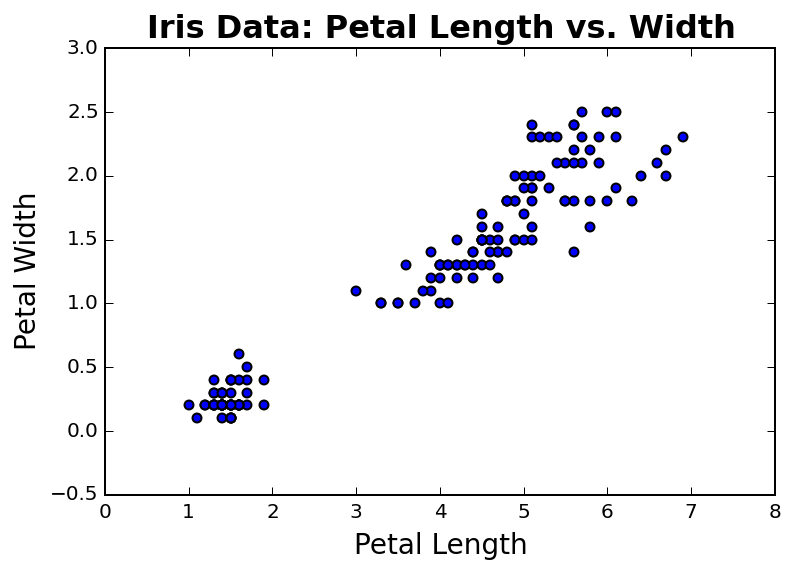

In [172]:
# Let's start looking at some data. 
# Let's start with a scatter plot of petal length vs. petal width
plt.scatter(iris.data[:, petal_length_ind], iris.data[:, petal_width_ind])

# Add title and labels
plt.title('Iris Data: Petal Length vs. Width', fontsize=16, fontweight='bold')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)

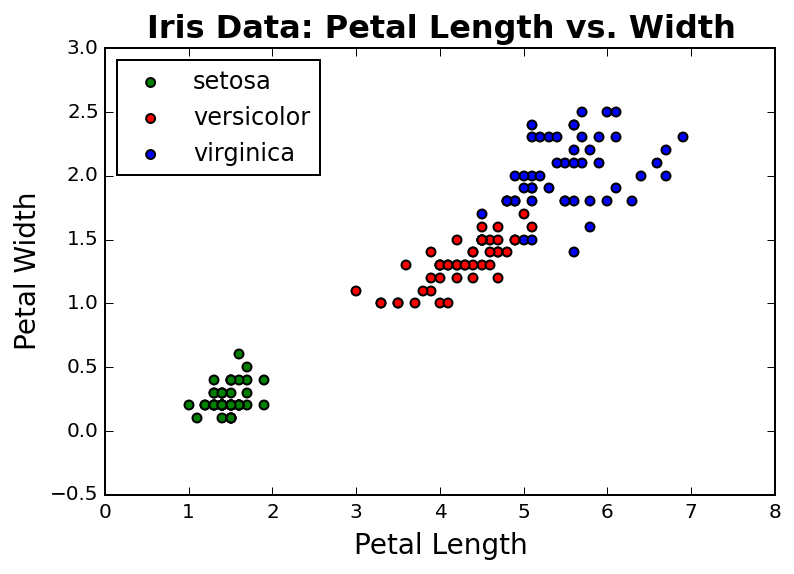

In [199]:
# Plot the data colour coded by label
fig = plt.figure(1)
plt.scatter(iris.data[:, petal_length_ind][iris.target==0], iris.data[:, petal_width_ind][iris.target==0], c='green', label=iris.target_names[0])
plt.scatter(iris.data[:, petal_length_ind][iris.target==1], iris.data[:, petal_width_ind][iris.target==1], c='red', label=iris.target_names[1])
plt.scatter(iris.data[:, petal_length_ind][iris.target==2], iris.data[:, petal_width_ind][iris.target==2], c='blue', label=iris.target_names[2])

# Add title, labels and legend
plt.title('Iris Data: Petal Length vs. Width', fontsize=16, fontweight='bold')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.legend(scatterpoints=1, loc='upper left')

# Note that splitting up the plotting per group is basically to make the legend work
# The following command plots the data perfectly well, colour coded by target, but it's a pain to get a labelled legend. 
# plt.scatter(iris.data[:, petal_length_ind], iris.data[:, petal_width_ind], c=iris.target)

#### Classification

So we have a bunch of data points, and some labels for what they are. 

One of the main applications of Machine Learning is trying to understand our data, by having some model of it or some kind of classifier, such that if we get a new data point we can predict things about it. 

Let's start with a fairly simple way to classify data: K-nearest neighbours.
K-Nearest Neighbours is an algorithm for classifying data points.
Basically it says that the label for a data point should be the one it's K closest neighbours have. 
The logic is that a new data is most likely in the same group as the data points near it. 
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

Note: as we'll see with K-Nearest Neighbours, a typical approach in sklearn is to create a type of variable that contains our model all collected together, and we use that to train and predict with. 

This is using the fact that Python is an object oriented programming (OOP) language, with classes. 

Learn more about OOP here: https://www.jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/

In [195]:
# Create a K-nearest neighbours classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

# We now have a variable called 'knn' which is of type K-NearestNeighbours class
# We can use this to train our classifier on our data, and to predict new data points
print type(knn)

# Fit the model to our data
# Here we give the 'fit' function all our data, and the labels it has
knn.fit(iris.data, iris.target)

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

['versicolor']


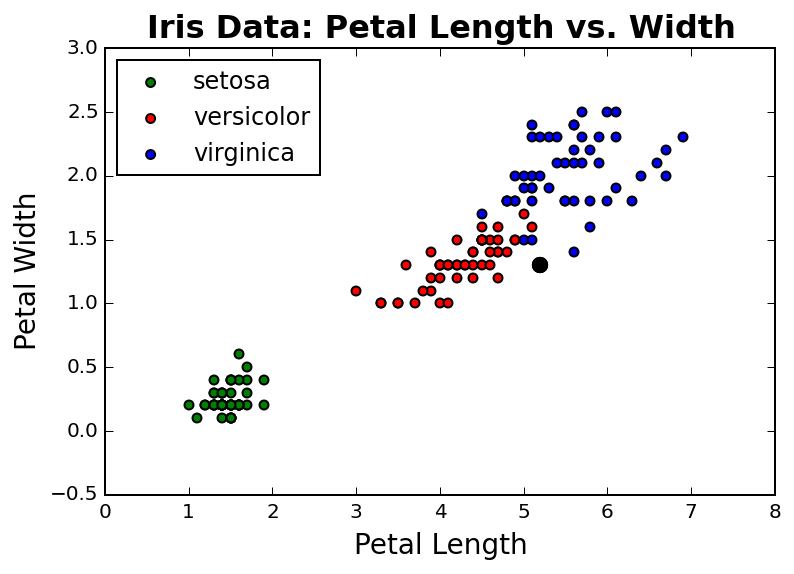

In [204]:
# So now we have a classifier fit to our data
# Can we predict the type of flower if we have new data, knowing only the sepal and petal sizes.

# Create a new data point. 
new_data = np.array([3.1, 4.9, 5.2, 1.3])

# Predict the label of our new data point
prediction_result = knn.predict(new_data)
print iris.target_names[prediction_result]

# Plot our new data point on our figure from before
fig.gca().scatter(new_data[petal_length_ind], new_data[petal_width_ind], c='black', s=50)
display(fig)

# The black circle on the figure is our new data point, for which we don't know the label. 
# It's not obvious what type of flower we expect it to be. 
# Our knn classifier is suggesting the label should be 'versicolor', or the red ones.
# That seems reasonable! We just predicted something new about our data!

# Note that our classifier and our visualization are not exactly the same here. 
# Our classifier is using the 4-dimensional data. 
# Because we can't really plot 4D data, here we are only looking at two dimensions of our data. 

#### Clustering / Unsupervised Learning

There are lots of other things we can do with Machine Learning. 

What if we knew there were three types of flowers in our dataset, but had lost the labels?
Maybe we could look for some kind of structure in the data, and see if we can figure out 3 likely cluster. 

This kind of problem, looking for structure in the data when you don't know the answer, is called 'Unsupervised Learning'.

Note: here we said we know there are 3 types of flowers. This is more information than we'd usually have in Unsupervised Learning. Often, not only do we not know the answer to which data point is part of which group, we might not even know how many groups there are. 

Least try K-means clustering. K means clustering is an algorithm to try to group data points together into clusters. 
We choose a number, k, which is our guess of how many clusters there are, and then the algorithm tries to find where these clusters would be that best fits the data. 
https://en.wikipedia.org/wiki/K-means_clustering

In [187]:
# Let's try clustering this data. 
# Start by collecting data into a matrix format to give to clustering algorithm
# This grabs the two columns of data we want, makes them numpy arrays, stacks them together
# At the end it takes transpose to get [data, features]
data = np.vstack((np.array(iris.data[:, petal_length_ind]), np.array(iris.data[:, petal_width_ind]))).T

# Now we have 150 rows of data, with 2 features for each datapoint
print shape(data)

(150, 2)


In [188]:
# Try K-means Clustering

# Set K: the number of clusters to get
k = 3

# Do K-means
cluster_centers, cluster_labels, inertia = cluster.k_means(data, n_clusters=k)
# cluster_centers is the location of the center of the clusters the algorith found
# cluster_labels is the label saying which cluster each data point belongs to
# inertia is the sum of squared distances from data point to cluster center. 
#    It's somewhat analogous to how good a fit the clustering is

print 'Centroids: ', cluster_centers
print 'Labels: ', cluster_labels
print 'Inertia: ', inertia

Centroids:  [[ 5.59583333  2.0375    ]
 [ 1.464       0.244     ]
 [ 4.26923077  1.34230769]]
Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
Inertia:  31.3877589744


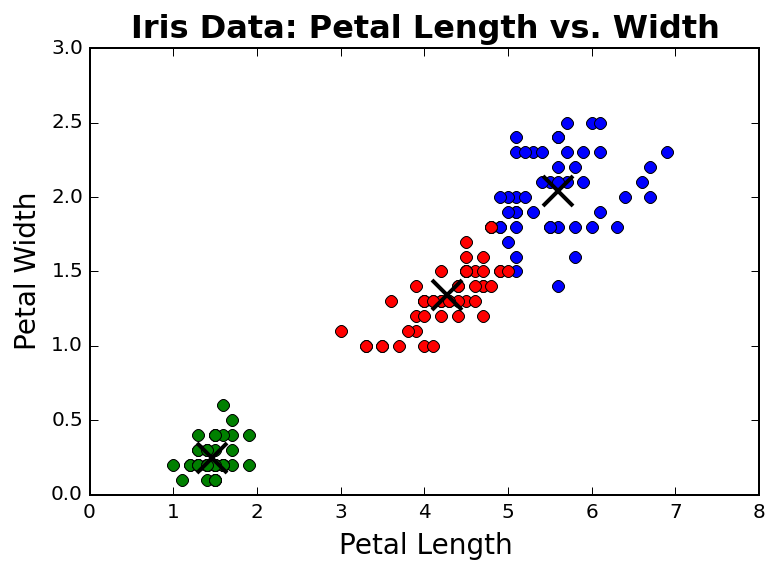

In [193]:
# Plot the clustered data
# Loop through the clusters
for i in range(k):
    # Select only data with cluster label i
    cluster_i = data[np.where(cluster_labels==i)]
    # Plot the cluster
    plt.plot(cluster_i[:,0],cluster_i[:,1],'o')
    # Plot the centroids
    center_i = plt.plot(cluster_centers[i,0], cluster_centers[i,1],'kx')
    # Make the center x bigger. 
    plt.setp(center_i, ms=15.0)      # ms is marker size
    plt.setp(center_i, mew=2.0)      # mew is marker edge size
    
# Set Plot Ranges
plt.xlim([0, 8])
plt.ylim([0, 3])

# Add title and labels
plt.title('Iris Data: Petal Length vs. Width', fontsize=16, fontweight='bold')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)

# Show the plot
plt.show()

# That looks pretty similar to our target labels! That's good. 
# Remember, we didn't tell K-means anything about our target labels. 
# And yet just by asking for 3 groups, we get something that looks really similar to our actual labels. 
# Cool!

#### Another Example - Labelling Digits with SVM

Let's try one last classic example - labelling written characters. 

Specifically, we are going to look at another built in dataset which is a collection of images of messy digits.

Can we train some kind of model and/or classifier to label new data?

Let's try with a Support Vector Machine (SVM). For now we are going to treat SVM as a black box - I am not going to try to explain here what it is or how it works, but you can find more information here:
https://en.wikipedia.org/wiki/Support_vector_machine

In [253]:
# Load the digits dataset
digits = datasets.load_digits()

# In this dataset, we again have a collection of data (digits.data) and their labels (digits.target)

# Check how many images we have
n_images =  len(digits.images)
print 'Number of Images: ', n_images

Number of Images:  1797


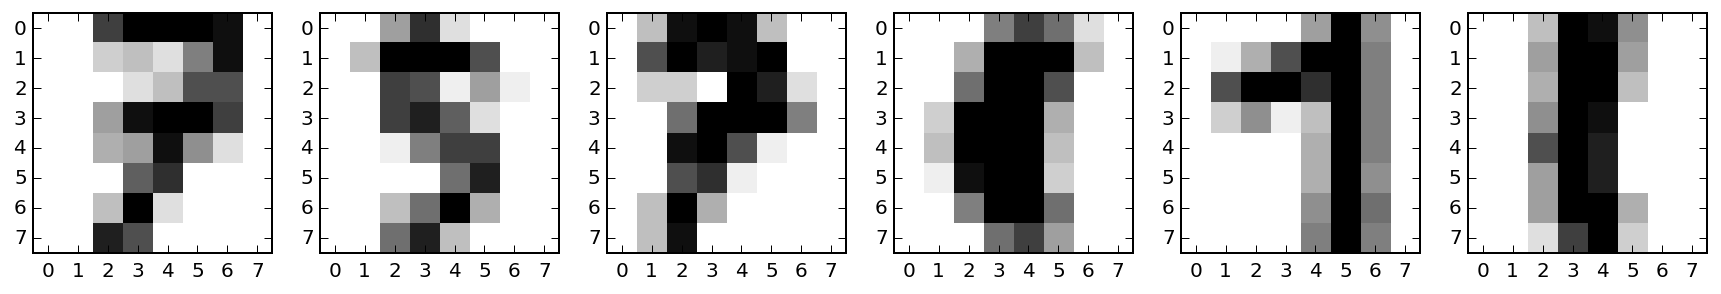

In [248]:
# Plot some examples from the dataset

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6)

# Add an image to each subplot
ax1.imshow(digits.images[random.randint(n_images)], cmap=plt.cm.gray_r, interpolation='nearest')
ax2.imshow(digits.images[random.randint(n_images)], cmap=plt.cm.gray_r, interpolation='nearest')
ax3.imshow(digits.images[random.randint(n_images)], cmap=plt.cm.gray_r, interpolation='nearest')
ax4.imshow(digits.images[random.randint(n_images)], cmap=plt.cm.gray_r, interpolation='nearest')
ax5.imshow(digits.images[random.randint(n_images)], cmap=plt.cm.gray_r, interpolation='nearest')
ax6.imshow(digits.images[random.randint(n_images)], cmap=plt.cm.gray_r, interpolation='nearest')

# Set the size for the figure
fig.set_figheight(15)
fig.set_figwidth(15)

# Show the plot
plt.show()

In [254]:
# Create our SVM classifier.
# gamma and C are specifying two parameters for our SVM. 
# We are not going to dive into them here, you can ignore them for now. 
classifier = svm.SVC(gamma=0.001, C=100)

In [255]:
# Train a classifier with everything except the last image
classifier.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

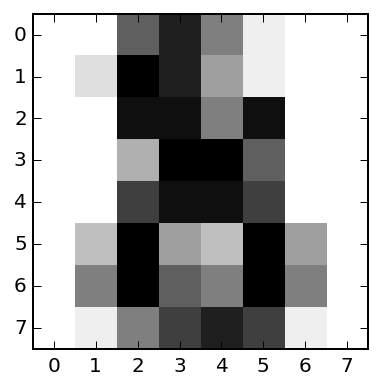

Prediction:  [8]


In [256]:
# Now we have a classifier trained on almost all of our data
# Now, can we predict the label of the last image?
# Remember, our classifier has never seen this image before. 

# Show the image we are trying to predict. 
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Ask our classifier what the digit is
print 'Prediction: ', classifier.predict(digits.data[-1:])

# Our classifier think this image is an 8! That seems reasonable. 
# We have just predicted the label of a really messy digit with Machine Learning!

#### Machine Learning

scikit-learn is a very powerful toolbox, and not too difficult to apply to data. 

However, while it may be easy to run a function on some data and get results back out, it is often difficult to interpret the outcomes, and/or to know for sure if you are doing the right tests with the right parameters. Being good at Machine Learning has a lot more to do with understanding the logic behind the functions rather than the coding ability to use the functions. 

If you'd like to explore Machine Learning, both Udacity and Coursera have good online classes for this kind of material. 

If you want a playground to explore and try Machine Learning, Kaggle might be a good place to explore. 
Kaggle is a website / company that hosts Data Science projects / competitions open to everyone. 
https://www.kaggle.com/about

Kaggle has a wiki with some useful stuff on it:
https://www.kaggle.com/wiki/Home

Kaggle also has some 'tutorials', which are basically guides through some data challenges with provided scripts:
Classification: https://www.kaggle.com/c/digit-recognizer
Prediction: https://www.kaggle.com/c/titanic
Detection: https://www.kaggle.com/c/facial-keypoints-detection